## <span style="color:blue"> Imbalanced Dataset (Imbalanced Classes) in Machine Learning and Different Techniques to deal with Imbalanced Dataset

Class Imbalance is a common problem in machine learning, especially in classification problems. Imbalance data can hamper our model accuracy big time.

Imbalanced datasets can be found for different use cases in various domains:
 - Finance: Fraud detection datasets commonly have a fraud rate of ~1–2%
 - Ad Serving: Click prediction datasets also don’t have a high clickthrough rate.
 - Transportation/Airline: Will Airplane failure occur?
 - Medical: Does a patient has cancer?
 - Content moderation: Does a post contain NSFW(Not safe for work) content?

Have you ever faced an issue where you have such a small sample for the positive class in your dataset that the model is unable to learn?

In such cases, you get a pretty high accuracy just by predicting the majority class, but you fail to capture the minority class, which is most often the point of creating the model in the first place.

Imbalanced datasets are a special case for classification problem where the class distribution is not uniform among the classes. Typically, they are composed by two classes: The majority (negative) class and the minority (positive) class

### What would be the problem with Class Imbalance dataset while using in Machine Learning modelling ?

Most machine learning algorithms work best when the number of samples in each class are about equal. This is because most algorithms are designed to maximize accuracy and reduce errors.

However, if the data set is imbalance then In such cases, we get a pretty high accuracy just by predicting the majority class, but we fail to capture the minority class, which is most often the point of creating the model in the first place.

### Credit Card Defaulters Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [2]:
## Load Dataset
df_default = pd.read_csv("https://raw.githubusercontent.com/atulpatelDS/Data_Files/master/Credit_Card_Defaulter/Credit_Card_defaulters.csv")

In [3]:
df_default.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


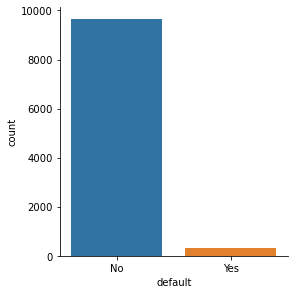

In [4]:
##lets visualise the categorical features
sns.catplot(x = "default",data= df_default,kind="count",height=4,aspect=1)

In [5]:
df_default.default.value_counts()

No     9667
Yes     333
Name: default, dtype: int64

We can clearly see that there is a huge difference between the data set. 9667 non-defaulters transactions and 333 defaulters.

In [6]:
# Apply encoding on Categorical columns
#df_default["default"] = df_default["default"].apply({"No":0,"Yes":1}.get)
df_default["default"] = df_default["default"].replace(["No","Yes"],[0,1])
df_default["student"] = df_default["student"].map({"No":0,"Yes":1})

In [7]:
df_default.shape

(10000, 4)

In [8]:
df_default.head()

,default,student,balance,income
0,0,0,729.526495,44361.62507
1,0,1,817.180407,12106.13470
2,0,0,1073.549164,31767.13895
3,0,0,529.250605,35704.49394
4,0,0,785.655883,38463.49588


In [9]:
Counter(df_default.default)

Counter({0: 9667, 1: 333})

In [10]:
## Import librairies
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,auc,average_precision_score,confusion_matrix,f1_score
from sklearn.metrics import precision_score,recall_score,precision_recall_curve,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [11]:
# create X and y 
X = df_default.drop("default", axis=1)
y = df_default["default"]

In [12]:
Counter(y)

Counter({0: 9667, 1: 333})

In [13]:
## split X and Y
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [14]:
X_train.shape

(7000, 3)

In [15]:
X_test.shape

(3000, 3)

In [16]:
y_train.value_counts()

0    6761
1     239
Name: default, dtype: int64

# <span style="color:red"> 1. Resampling Technique to handle the Imbalanced dataset

- Undersampling : removing some observations of the majority class(class:0). This is done until the majority and minority class is balanced out.

- Oversampling : adding more examples from the minority class(Class:1)
- Combining Oversampling and Undersampling

In [17]:
df_default.default.value_counts()

0    9667
1     333
Name: default, dtype: int64

<img src="https://raw.githubusercontent.com/atulpatelDS/Machine_Learning/master/Images/Undersampling_Oversampling.PNG" width="940" height="340" align="left"/>

In [18]:
# class count
y_train_count_0, y_train_count_1 = y_train.value_counts()
# Separate the class
y_train_0 = y_train[y_train == 0]
y_train_1 = y_train[y_train == 1]
# print the shape of the class
print('class 0:', y_train_0.shape)
print('class 1:', y_train_1.shape)

class 0: (6761,)
class 1: (239,)


## <span style="color:green"> Under-Sampling to deal with Imbalanced Dataset

### <span style="color:blue"> 1 : Random Under-Sampling

In [19]:
type(y_train_0)

pandas.core.series.Series

total class : 
0    239
1    239
Name: default, dtype: int64


<AxesSubplot:title={'center':'count (y_train)'}>

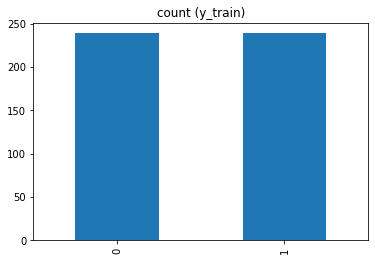

In [20]:
y_train_0_under = y_train_0.sample(y_train_count_1)

y_train_under = pd.concat([y_train_0_under, y_train_1], axis=0)

print("total class : ")
print(y_train_under.value_counts())
# plot the count after under-sampeling
y_train_under.value_counts().plot(kind='bar', title='count (y_train)')

### <span style="color:blue"> 2 : Random under-sampling with imblearn

In [21]:
import imblearn

In [22]:
from imblearn.under_sampling import RandomUnderSampler

In [23]:
rus = RandomUnderSampler()
X_train_rus,y_train_rus = rus.fit_sample(X_train,y_train)

In [24]:
y_train_rus.shape

(478,)

In [25]:
X_train_rus.shape

(478, 3)

In [26]:
print('original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_train_rus))

original dataset shape: Counter({0: 6761, 1: 239})
Resample dataset shape Counter({0: 239, 1: 239})


### <span style="color:blue"> 3 : Under-sampling: Tomek links

Tomek links are pairs of very close instances but of opposite classes. By removing the examples of the majority class of each pair, we increase the space between the two classes and move toward balancing the dataset by deleting those points.


<img src="https://raw.githubusercontent.com/atulpatelDS/Machine_Learning/master/Images/tomlink.PNG" width="540" height="240" align="left"/>

In [27]:
from imblearn.under_sampling import TomekLinks

In [28]:
tl = TomekLinks(sampling_strategy='majority')
X_train_tl,y_train_tl = tl.fit_sample(X_train,y_train)

In [29]:
print('original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_train_tl))

original dataset shape: Counter({0: 6761, 1: 239})
Resample dataset shape Counter({0: 6670, 1: 239})


### <span style="color:blue"> 4 : Undersampling with Cluster Centroids

remove the unimportant instance from the majority class. To decide whether an instance is important or not, we use the concept of clustering on the geometry of the feature space.

<img src="https://raw.githubusercontent.com/atulpatelDS/Machine_Learning/master/Images/clustercentrlid.PNG" width="540" height="240" align="left"/>

Steps :
 - find cluster centroid
 - The instance belonging to the cluster (majority class), which is farthest from the cluster centroid in the feature space, is considered to be the most unimportant instance.
 - The instance belonging to the majority class, which is nearest to the cluster centroid in the feature space, is considered to be the most important instance.

In [30]:
from imblearn.under_sampling import ClusterCentroids

In [31]:
# instantiate the object with the right ratio.
cc = ClusterCentroids(sampling_strategy="auto")

# fit the object to the training data.
X_train_cc, y_train_cc = cc.fit_sample(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


In [32]:
print('original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_train_cc))

original dataset shape: Counter({0: 6761, 1: 239})
Resample dataset shape Counter({0: 239, 1: 239})


### <span style="color:blue"> 5 : NearMiss Undersampling

The NearMiss algorithm has been proposed to solve the issue of potential information loss. It’s based on the nearest neighbor algorithm and has a lot of variations that we’ll see in this section.

The basics of the NearMiss algorithms include the following:
 - The method starts by calculating the distances between all instances of the majority class and the instances of the minority class.
 - Then k instances of the majority class that have the smallest distances to those in the minority class are selected to be retained.
 - If there are n instances in the minority class, NearMiss will result in k × n instances of the majority class.

<img src="https://raw.githubusercontent.com/atulpatelDS/Machine_Learning/master/Images/nearmiss.PNG" width="540" height="240" align="left"/>

Here are the different versions of this algorithm:
 - NearMiss-1 chooses instances of the majority class where their average distances to the three closest instances of the minority class are the smallest.
 - NearMiss-2  chooses instances of the majority class where their average distances to the three farthest samples of the minority class are the smallest.
 - NearMiss-3 picks a given number of the closest samples of the majority class for each sample of the minority class.

In [33]:
from imblearn.under_sampling import NearMiss

In [34]:
# create the object with auto
nm = NearMiss(sampling_strategy="not minority")

# fit the object to the training data.
X_train_nm, y_train_nm = nm.fit_sample(X_train, y_train)

In [35]:
print('original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_train_nm))

original dataset shape: Counter({0: 6761, 1: 239})
Resample dataset shape Counter({0: 239, 1: 239})


### <span style="color:blue"> 6 : Undersampling with Neighbourhood Cleaning Rule

Neighbourhood Cleaning Rule deals with the majority and minority samples separately when sampling the datasets.
NCR starts by calculating the nearest k(default = 3) neighbors for all instances in the training set. We then do the following:
 - If the instance belongs to the majority class and the classification given by its three nearest neighbors is the opposite of the class of the chosen instance — then the chosen instance is removed.
 - If the instance belongs to the minority class and it’s misclassified by its three nearest neighbors — then the nearest neighbors that belong to the majority class are removed.

In [36]:
from imblearn.under_sampling import NeighbourhoodCleaningRule

In [37]:
# create the object to resample the majority class.
ncr = NeighbourhoodCleaningRule(sampling_strategy="majority")

# fit the object to the training data.
X_train_ncr, y_train_ncr = ncr.fit_sample(X_train, y_train)

In [38]:
print('original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_train_ncr))

original dataset shape: Counter({0: 6761, 1: 239})
Resample dataset shape Counter({0: 6354, 1: 239})


### Creating logistic Regression Model before Under-Sampling

In [39]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [40]:
y_pred = logreg.predict(X_test)
log_accuracy = metrics.accuracy_score(y_test,y_pred)
print("Accuracy Score before Sampling : ", log_accuracy)
print("ROC AUC Score before Sampling : ",metrics.roc_auc_score(y_test,y_pred))
classification = metrics.classification_report(y_test,y_pred)
print(classification)

Accuracy Score before Sampling :  0.9683333333333334
ROC AUC Score before Sampling :  0.5976226735587413
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2906
           1       0.49      0.20      0.29        94

    accuracy                           0.97      3000
   macro avg       0.73      0.60      0.63      3000
weighted avg       0.96      0.97      0.96      3000



We can see 96.8% accuracy with Logictic Regression..
We are getting very high accuracy because it is predicting mostly the majority class that is 0 (Non-Defaulters).

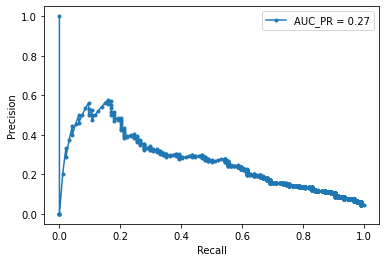

In [41]:
probas_pred = logreg.predict_proba(X_test)[:, 1]
# calculate model precision-recall curve
precision, recall, _ = metrics.precision_recall_curve(y_test, probas_pred)
# calculate precision-recall-AUC for above graph
auc_p_r = auc(recall, precision)
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label = 'AUC_PR = %0.2f' % auc_p_r)
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

### Creating logistic Regression Model using Under-Sampling DataSet

In [42]:
logreg_under = LogisticRegression()
#logreg_under.fit(X_train_ncr,y_train_ncr)
logreg_under.fit(X_train_nm,y_train_nm)
#logreg_under.fit(X_train_cc,y_train_cc)

LogisticRegression()

In [43]:
y_pred_under = logreg_under.predict(X_test)
## Measure performance metrics
log_accuracy_under = metrics.accuracy_score(y_test,y_pred_under)
print("Accuracy Score Under Sampling : ", log_accuracy_under)
print("ROC AUC Score after Sampling : ",metrics.roc_auc_score(y_test,y_pred_under))
classification_under = metrics.classification_report(y_test,y_pred_under)
print(classification_under)

Accuracy Score Under Sampling :  0.917
ROC AUC Score after Sampling :  0.8027448712128977
              precision    recall  f1-score   support

           0       0.99      0.92      0.96      2906
           1       0.23      0.68      0.34        94

    accuracy                           0.92      3000
   macro avg       0.61      0.80      0.65      3000
weighted avg       0.97      0.92      0.94      3000



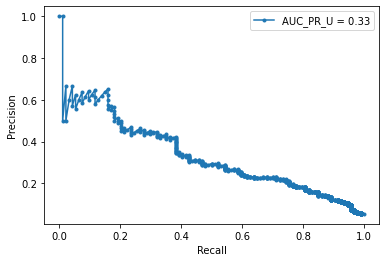

In [44]:
probas_pred_under = logreg_under.predict_proba(X_test)[:, 1]
# calculate model precision-recall curve
precision_u, recall_u, _ = metrics.precision_recall_curve(y_test, probas_pred_under)
# calculate precision-recall-AUC
auc_p_r_u = auc(recall_u, precision_u)
# plot the model precision-recall curve
plt.plot(recall_u, precision_u, marker='.', label = 'AUC_PR_U = %0.2f' % auc_p_r_u)
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

## <span style="color:green"> Over-Sampling to deal with Imbalanced Dataset

### <span style="color:blue"> 1 : Random Over-Sampling

total class : 
0    6761
1    6761
Name: default, dtype: int64


<AxesSubplot:title={'center':'count y_train)'}>

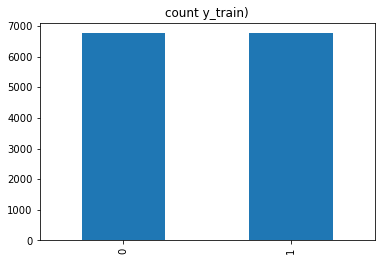

In [45]:
y_train_1_over = y_train_1.sample(y_train_count_0,replace = True)

y_train_over = pd.concat([y_train_1_over, y_train_0], axis=0)

print("total class : ")
print(y_train_over.value_counts())
# plot the count after over-sampeling
y_train_over.value_counts().plot(kind='bar', title='count y_train)')

### <span style="color:blue"> 2 : Random over-sampling with imblearn

In [46]:
from imblearn.over_sampling import RandomOverSampler

In [47]:
ros = RandomOverSampler()
X_train_ros,y_train_ros = ros.fit_sample(X_train,y_train)

In [48]:
y_train_ros.shape

(13522,)

In [49]:
print('original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_train_ros))

original dataset shape: Counter({0: 6761, 1: 239})
Resample dataset shape Counter({0: 6761, 1: 6761})


### <span style="color:blue"> 3 : Synthetic Minority Oversampling Technique (SMOTE)

This technique generates synthetic data for the minority class.It works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

SMOTE algorithm works in 4 simple steps:

- Choose a minority class as the input vector
- Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)
- Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration  and its chosen neighbor
- Repeat the steps until data is balanced

SMOTE is used to synthesize data where the features are continuous and a classification problem.

<img src="https://raw.githubusercontent.com/atulpatelDS/Machine_Learning/master/Images/smote.PNG" width="540" height="240" align="left"/>

In [50]:
from imblearn.over_sampling import SMOTE

In [51]:
# create the  object with the desired sampling strategy.
smote = SMOTE(sampling_strategy='minority',random_state=42)

# fit the object to our training data
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train)

In [52]:
print('original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_train_smote))

original dataset shape: Counter({0: 6761, 1: 239})
Resample dataset shape Counter({0: 6761, 1: 6761})


### <span style="color:blue"> 4 : SMOTE-NC

I have mention that SMOTE only works for continuous features. So, what to do if you have mixed (categorical and continuous) features? In this case, we have another variation of SMOTE called SMOTE-NC (Nominal and Continuous).

You might think, then, just transform the categorical data into numerical; therefore, we had a numerical feature for SMOTE to use. The problem is when we did that; we would have data that did not make any sense.

In [53]:
#Import the SMOTE-NC
from imblearn.over_sampling import SMOTENC

In [54]:
# create the  object with the desired sampling strategy.
# For SMOTE-NC we need to pinpoint the column position where is the categorical features are. 
# In this case, 'IsActiveMember' is positioned in the second column we input [1] as the parameter. 
# If you have more than one categorical columns, just input all the columns position
smotenc = SMOTENC([0],sampling_strategy='minority') 

# fit the object to our training data
X_train_smotenc, y_train_smotenc = smotenc.fit_sample(X_train, y_train)

In [55]:
print('original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_train_smotenc))

original dataset shape: Counter({0: 6761, 1: 239})
Resample dataset shape Counter({0: 6761, 1: 6761})


### <span style="color:blue"> 5 : Borderline-SMOTE

unlike with the SMOTE, where the synthetic data are created randomly between the two data, Borderline-SMOTE method create synthetic examples along the decision boundary between the two classes.It involves selecting those instances of the minority class that are misclassified, such as with a k-nearest neighbor classification model.

We can then oversample just those difficult instances, providing more resolution only where it may be required.

Also, there are two kinds of Borderline-SMOTE

1. Borderline-SMOTE1
2. Borderline-SMOTE2



https://sci2s.ugr.es/keel/keel-dataset/pdfs/2005-Han-LNCS.pdf

In [56]:
from imblearn.over_sampling import BorderlineSMOTE

In [57]:
bsmote1 = BorderlineSMOTE(kind = 'borderline-1',sampling_strategy='minority',random_state = 42)

In [58]:
# fit the object to our training data
X_train_bsmote1, y_train_bsmote1 = bsmote1.fit_sample(X_train, y_train)

In [59]:
print('original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_train_bsmote1))

original dataset shape: Counter({0: 6761, 1: 239})
Resample dataset shape Counter({0: 6761, 1: 6761})


In [60]:
bsmote2 = BorderlineSMOTE(kind = 'borderline-2',sampling_strategy='minority',random_state = 42)

In [61]:
# fit the object to our training data
X_train_bsmote2, y_train_bsmote2 = bsmote2.fit_sample(X_train, y_train)

In [62]:
print('original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_train_bsmote2))

original dataset shape: Counter({0: 6761, 1: 239})
Resample dataset shape Counter({0: 6761, 1: 6761})


### <span style="color:blue"> 5 : Borderline-SMOTE SVM

The main differences between SVM-SMOTE and the other SMOTE are that instead of using K-nearest neighbors to identify the misclassification in the Borderline-SMOTE, the technique would incorporate the SVM algorithm.

In the SVM-SMOTE, the borderline area is approximated by the support vectors after training SVMs classifier on the original training set. Synthetic data will be randomly created along the lines joining each minority class support vector with a number of its nearest neighbors.
What special about Borderline-SMOTE SVM compared to the Borderline-SMOTE is that more data are synthesized away from the region of class overlap. It focuses more on where the data is separated.

In [63]:
from imblearn.over_sampling import SVMSMOTE

In [64]:
svmsmote = SVMSMOTE(sampling_strategy='minority',random_state = 42)

In [65]:
# fit the object to our training data
X_train_svmsmote, y_train_svmsmote= svmsmote.fit_sample(X_train, y_train)

In [66]:
print('original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_train_svmsmote))

original dataset shape: Counter({0: 6761, 1: 239})
Resample dataset shape Counter({0: 6761, 1: 6761})


### <span style="color:blue"> 5 : KMeansSMOTE 

Apply a KMeans clustering before to over-sample using SMOTE.

K-Means SMOTE works in three steps:
 - Cluster the entire input space using k-means.
 - Distribute the number of samples to generate across clusters:
     - Select clusters which have a high number of minority class samples.
     - Assign more synthetic samples to clusters where minority class samples are sparsely distributed.
 - Oversample each filtered cluster using SMOTE.

In [67]:
from imblearn.over_sampling import KMeansSMOTE

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [69]:
scale = StandardScaler()
X_train_scale = scale.fit_transform(X_train)

In [70]:
### Elbow method to find the No of cluster using WSS
wss = []
cluster = list(range(1,12))

for k in cluster:
    kmean = KMeans(n_clusters= k,init="k-means++",random_state = 42)
    kmean.fit(X_train_scale)
    wss.append(kmean.inertia_)

Text(0.5, 0, 'No of Cluster')

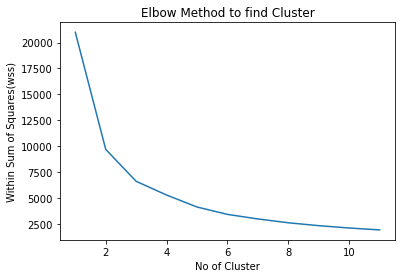

In [71]:
plt.title("Elbow Method to find Cluster")
sns.lineplot(x=cluster,y=wss)
plt.ylabel("Within Sum of Squares(wss)")
plt.xlabel("No of Cluster")

In [72]:
ksmote = KMeansSMOTE(
    sampling_strategy='minority',
    #random_state = 42,
    k_neighbors=2,
    kmeans_estimator=2,
    cluster_balance_threshold=0.02,
    density_exponent='auto')

In [73]:
# fit the object to our training data
X_train_ksmote, y_train_ksmote = ksmote.fit_resample(X_train, y_train)

In [74]:
print('original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_train_ksmote))

original dataset shape: Counter({0: 6761, 1: 239})
Resample dataset shape Counter({1: 6762, 0: 6761})


### <span style="color:blue"> 4 : Oversampling with Adaptive Synthetic sampling(ADASYN)

It measures the K-nearest neighbors for all minority instances, then calculates the class ratio of the minority and majority instances to create new samples.
Repeating this process, we will adaptively shift the decision boundary to focus on those samples that are hard to learn.
The synthetic data generation would inversely proportional to the density of the minority class. It means more synthetic data are created in regions of the feature space where the density of minority examples is low, and fewer or none where the density is high.
In simpler terms, in an area where the minority class is less dense, the synthetic data are created more. Otherwise, the synthetic data is not made so much.

In [75]:
from imblearn.over_sampling import ADASYN

In [76]:
# create the object to resample the majority class.
adasyn = ADASYN(sampling_strategy="minority",random_state=42)

# fit the object to the training data.
X_train_adasyn, y_train_adasyn = adasyn.fit_sample(X_train, y_train)

In [77]:
print('original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_train_adasyn))

original dataset shape: Counter({0: 6761, 1: 239})
Resample dataset shape Counter({1: 6767, 0: 6761})


### Creating logistic Regression Model before Over-Sampling

In [78]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [79]:
y_pred = logreg.predict(X_test)
log_accuracy = metrics.accuracy_score(y_test,y_pred)
print("Accuracy Score before Sampling : ", log_accuracy)
print("ROC AUC Score before Sampling : ",metrics.roc_auc_score(y_test,y_pred))
classification = metrics.classification_report(y_test,y_pred)
print(classification)

Accuracy Score before Sampling :  0.9683333333333334
ROC AUC Score before Sampling :  0.5976226735587413
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2906
           1       0.49      0.20      0.29        94

    accuracy                           0.97      3000
   macro avg       0.73      0.60      0.63      3000
weighted avg       0.96      0.97      0.96      3000



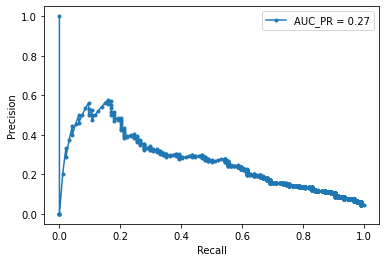

In [80]:
probas_pred = logreg.predict_proba(X_test)[:, 1]
# calculate model precision-recall curve
precision, recall, _ = metrics.precision_recall_curve(y_test, probas_pred)
# calculate precision-recall-AUC for above graph
auc_p_r = auc(recall, precision)
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label = 'AUC_PR = %0.2f' % auc_p_r)
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

### Creating logistic Regression Model using Over-Sampling DataSet

In [81]:
logreg_over = LogisticRegression()
#logreg_over.fit(X_train_ros,y_train_ros)
#logreg_over.fit(X_train_smote,y_train_smote)
logreg_over.fit(X_train_ksmote,y_train_ksmote)
#logreg_over.fit(X_train_adasyn,y_train_adasyn)
#logreg_over.fit(X_train_smotenc,y_train_smotenc)

LogisticRegression()

In [82]:
y_pred_over = logreg_over.predict(X_test)
## Measure performance metrics
log_accuracy_over = metrics.accuracy_score(y_test,y_pred_over)
print("Accuracy Score over Sampling : ", log_accuracy_over)
print("ROC AUC Score after Sampling : ",metrics.roc_auc_score(y_test,y_pred_over))
classification_over = metrics.classification_report(y_test,y_pred_over)
print(classification_over)

Accuracy Score over Sampling :  0.85
ROC AUC Score after Sampling :  0.85566180023722
              precision    recall  f1-score   support

           0       0.99      0.85      0.92      2906
           1       0.16      0.86      0.26        94

    accuracy                           0.85      3000
   macro avg       0.58      0.86      0.59      3000
weighted avg       0.97      0.85      0.90      3000



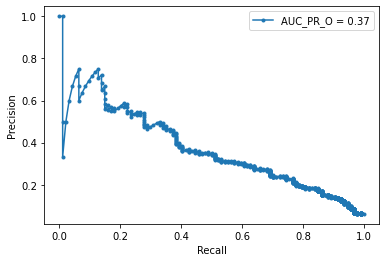

In [83]:
probas_pred_over = logreg_over.predict_proba(X_test)[:, 1]
# calculate model precision-recall curve
precision_o, recall_o, _ = metrics.precision_recall_curve(y_test, probas_pred_over)
# calculate precision-recall-AUC
auc_p_r_o = auc(recall_o, precision_o)
# plot the model precision-recall curve
plt.plot(recall_o, precision_o, marker='.', label = 'AUC_PR_O = %0.2f' % auc_p_r_o)
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

## <span style="color:green"> Combining Oversampling and Undersampling

We can combine oversampling and undersampling techniques to get better sampling results. Here are two ways that imblearn provides:

### <span style="color:blue"> 1 : Combining Oversampling and Undersampling - SMOTE & Tomek Links 

In [109]:
from imblearn.combine import SMOTETomek

In [110]:
# create the  object with the desired sampling strategy.
smotemek = SMOTETomek(sampling_strategy='minority')

# fit the object to our training data.
X_train_smt, y_train_smt = smotemek.fit_sample(X_train, y_train)

In [111]:
print('original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_train_smt))

original dataset shape: Counter({0: 6761, 1: 6761})
Resample dataset shape Counter({0: 6569, 1: 6569})


### <span style="color:blue"> 2 : Combining Oversampling and Undersampling - SMOTE & Edited Nearest Neighbor

In [112]:
from imblearn.combine import SMOTEENN

In [113]:
# create the  object with the desired samplig strategy.
smoenn = SMOTEENN(sampling_strategy='minority')

# fit the object to our training data.
X_train_smtenn, y_train_smtenn = smoenn.fit_sample(X_train, y_train)

In [114]:
print('original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_train_smtenn))

original dataset shape: Counter({0: 6761, 1: 6761})
Resample dataset shape Counter({0: 5895, 1: 5832})


### Creating logistic Regression Model using Combined-Sampling

In [115]:
logreg_com = LogisticRegression()
#logreg_com.fit(X_train_smt,y_train_smt)
logreg_com.fit(X_train_smtenn,y_train_smtenn)


LogisticRegression()

In [116]:
y_pred_com = logreg_com.predict(X_test)
## Measure performance metrics
log_accuracy_com = metrics.accuracy_score(y_test,y_pred_com)
print("Accuracy Score com Sampling : ", log_accuracy_com)
print("ROC AUC Score after Sampling : ",metrics.roc_auc_score(y_test,y_pred_com))
classification_com = metrics.classification_report(y_test,y_pred_com)
print(classification_com)

Accuracy Score com Sampling :  0.871
ROC AUC Score after Sampling :  0.8767956246064633
              precision    recall  f1-score   support

           0       1.00      0.87      0.93      2906
           1       0.18      0.88      0.30        94

    accuracy                           0.87      3000
   macro avg       0.59      0.88      0.61      3000
weighted avg       0.97      0.87      0.91      3000



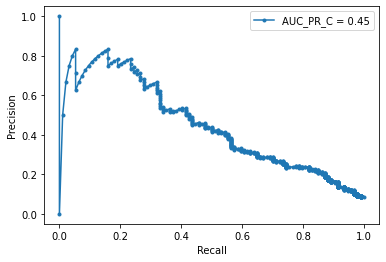

In [117]:
probas_pred_com = logreg_com.predict_proba(X_test)[:, 1]
# calculate model precision-recall curve
precision_c, recall_c, _ = metrics.precision_recall_curve(y_test, probas_pred_com)
# calculate precision-recall-AUC
auc_p_r_c = auc(recall_c, precision_c)
# plot the model precision-recall curve
plt.plot(recall_c, precision_c, marker='.', label = 'AUC_PR_C = %0.2f' % auc_p_r_c)
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

# <span style="color:red"> 2 : Resampling technique using right performance metric

Accuracy is not the best metric to use when evaluating imbalanced datasets as it can be misleading.

Choosing the right evaluation metric is pretty essential whenever we work with imbalanced datasets. Generally, in such cases, the F1 Score is what I want as my evaluation metric. The F1 score is a number between 0 and 1 and is the harmonic mean of precision and recall.

So how does it help?

- Let us start with a binary prediction problem. We are predicting if aeroplance will be crashed or not.So we   create a model that predicts “No” for the whole training set.
- What is the accuracy(Normally the most used evaluation metric)?
- It is more than 99%, and so according to accuracy, this model is pretty good, but it is worthless.

Now, what is the F1 score?
- Our precision here is 0. What is the recall of our positive class? It is zero. And hence the F1 score is also 0.
  And thus we get to know that the classifier that has an accuracy of 99% is worthless for our case. And hence it solves our problem.
  
Simply stated the F1 score maintain a balance between the precision and recall for your classifier. If your precision is low, the F1 is low, and if the recall is low again, your F1 score is low.

If you are a police inspector and you want to catch criminals, you want to be sure that the person you catch is a criminal (Precision) and you also want to capture as many criminals (Recall) as possible. The F1 score manages this tradeoff.

In [93]:
from sklearn.metrics import f1_score
y_true = [0,1,1,0,1,1,1,1,1,1,1,1,1,1,1]
y_pred = [0,0,1,0,0,1,1,1,1,0,1,1,1,1,0]
f1_score(y_true, y_pred)

0.8181818181818181

In [94]:
np.arange(0.1, 0.501, 0.01)

array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 ])

In [95]:
# The below function iterates through possible threshold values to find the one that gives the best F1 score.
# y_pred is an array of predictions
def bestThresshold(y_true,y_pred):
    best_thresh = None
    best_score = 0
    for thresh in np.arange(0.1, 0.501, 0.01):
        score = f1_score(y_true, np.array(y_pred)>thresh)
        if score > best_score:
            best_thresh = thresh
            best_score = score
    return best_score , best_thresh

In [96]:
bestThresshold(y_true,y_pred)

(0.8181818181818181, 0.1)

## <span style="color:red"> 3 : Resampling technique using Penalize Algorithms (Cost-Sensitive Training)

With some algorithms, we can add costs to force the model to pay attention to the minority class. There are penalized versions of algorithms such as penalized-SVM and logistic regression, even when using deep learning models throughout the class_weight attribute.

Most of the machine learning models provide a parameter called class_weights. For example, in a random forest classifier using, class_weights we can specify a higher weight for the minority class using a dictionary.So During training, we can use the argument class_weight to penalize mistakes on the minority class by an amount proportional to how under-represented it is.

**A popular algorithm for this technique is Penalized-SVM.**

In [97]:
print('original dataset shape:', Counter(y_train))
print('original dataset shape', Counter(y_test))

original dataset shape: Counter({0: 6761, 1: 239})
original dataset shape Counter({0: 2906, 1: 94})


In [98]:
# load library
from sklearn.svm import SVC

# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC(class_weight='balanced', probability=True) 
# probability=True ,if we want to enable probability estimates for SVM algorithms.

svc_model.fit(X_train, y_train)

svc_predict = svc_model.predict(X_test)
# check performance
print('ROCAUC score:',roc_auc_score(y_test, svc_predict))
print('Accuracy score:',accuracy_score(y_test, svc_predict))
print('F1 score:',f1_score(y_test, svc_predict))

ROCAUC score: 0.8733105387239899
Accuracy score: 0.8343333333333334
F1 score: 0.2571001494768311


**Another algorithm for this technique is LogisticRegression**

In [99]:
# we can add class_weight={0:1,1:10} to add panalize mistake
lgc_model = LogisticRegression(class_weight={0:1,1:10}) 

lgc_model.fit(X_train, y_train)

lgc_predict = lgc_model.predict(X_test)
# check performance
print('ROCAUC score:',roc_auc_score(y_test, lgc_predict))
print('Accuracy score:',accuracy_score(y_test, lgc_predict))
print('F1 score:',f1_score(y_test, lgc_predict))

ROCAUC score: 0.6581357719172365
Accuracy score: 0.8163333333333334
F1 score: 0.14307931570762056


## <span style="color:red"> 4 : Collect more and more Data

This is a definite thing you should try if you can. Getting more data with more positive examples is going to help your models get a more varied perspective of both the majority and minority classes.

## <span style="color:red"> 5 : Treat the problem as anomaly detection

You might want to treat your classification problem as an anomaly detection problem.

Anomaly detection is the identification of rare items, events or observations which raise suspicions by differing significantly from the majority of the data

You can use Isolation forests or autoencoders for anomaly detection.

## <span style="color:red"> 6 : Model-based

Some models are particularly suited for imbalanced datasets.

For example, in boosting models, we give more weights to the cases that get misclassified in each tree iteration.

### Using RandomForestClassifier Model

In [100]:
# load library
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(X_train, y_train)

# predict
rfc_predict = rfc.predict(X_test)
# check performance
print('ROCAUC score:',roc_auc_score(y_test, rfc_predict))
print('Accuracy score:',accuracy_score(y_test, rfc_predict))
print('F1 score:',f1_score(y_test, rfc_predict))

ROCAUC score: 0.64463472492715
Accuracy score: 0.9696666666666667
F1 score: 0.380952380952381


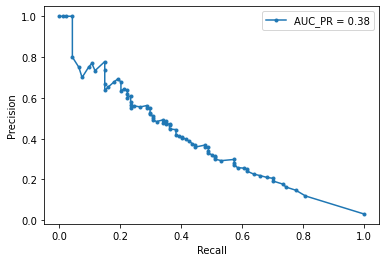

In [101]:
rfc_predprob = rfc.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, rfc_predprob)
# calculate precision-recall-AUC for above graph
auc_p_r = auc(recall, precision)
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label = 'AUC_PR = %0.2f' % auc_p_r)
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

### Using XGBClassifier Model

In [102]:
# load library
from xgboost import XGBClassifier

xgbc = XGBClassifier()

# fit the predictor and target
xgbc.fit(X_train, y_train)

# predict
xgbc_predict = xgbc.predict(X_test)
# check performance
print('ROCAUC score:',roc_auc_score(y_test, xgbc_predict))
print('Accuracy score:',accuracy_score(y_test, xgbc_predict))
print('F1 score:',f1_score(y_test, xgbc_predict))

ROCAUC score: 0.6463553030413963
Accuracy score: 0.973
F1 score: 0.40875912408759124


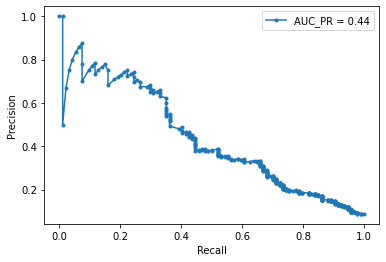

In [103]:
xgbc_predprob = xgbc.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, xgbc_predprob)
# calculate precision-recall-AUC for above graph
auc_p_r = auc(recall, precision)
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label = 'AUC_PR = %0.2f' % auc_p_r)
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

# <span style="color:red"> 6 : Use Cross Validation(CV) with Sampling

In [104]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline

#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

smote = SMOTE(random_state = 11)
X_train, y_train = smote.fit_resample(X_train, y_train)
pipeline = Pipeline(steps = [['scaler', MinMaxScaler()],
                             ['classifier', LogisticRegression(random_state=11,
                                                               max_iter=1000)]])

stratified_kfold = StratifiedKFold(n_splits=3,
                                       shuffle=True,
                                       random_state=11)
    
param_grid = {'classifier__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='f1',
                           cv=stratified_kfold,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

Cross-validation score: 0.9072034895887041
Test score: 0.3025830258302583


n the above code , we’ve split the data into training and test sets. Then we’ve oversampled the training examples using SMOTE and used the oversampled data to train the logistic regression model. We computed the cross-validation score and the test score on the test set. The method followed above is not a right way to use SMOTE or any undersampling/oversampling technique from the ‘imblearn’ package. This method may result in an inaccurate cross-validation score, which may be quite different from the test score or score on unseen data. 

Let’s look at the right way to use SMOTE while using cross-validation.

In [105]:
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)


pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                ['scaler', MinMaxScaler()],
                                ['classifier', LogisticRegression(random_state=11,
                                                                  max_iter=1000)]])

stratified_kfold = StratifiedKFold(n_splits=3,
                                       shuffle=True,
                                       random_state=11)
    
param_grid = {'classifier__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='f1', #roc_auc
                           cv=stratified_kfold,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

Cross-validation score: 0.9071385506935994
Test score: 0.3025830258302583


In the above code , we’ve used SMOTE as a part of a pipeline. This pipeline is not a ‘Scikit-Learn’ pipeline, but ‘imblearn’ pipeline. Since, SMOTE doesn’t have a ‘fit_transform’ method, we cannot use it with ‘Scikit-Learn’ pipeline.

From the results of the above two methods, we aren’t able to see a major difference between the cross-validation scores of the two methods. However, the second method resulted in a cross-validation score that is very slightly closer to the test score compared to the first method.

###  <span style="color:blue"> Advantage and Disadvantages of Over-sampling :

**Advantages**
 - Unlike under-sampling, this method leads to no information loss.
 - Outperforms under sampling

**Disadvantages**
 - If we duplicate random records from the minority class to do oversampling, this will cause overfitting.

### <span style="color:blue"> Advantage and Disadvantages of Under-sampling :

**Advantages**
 - It can help improve run time and storage problems by reducing the number of training data samples when the training data set is huge.

**Disadvantages**
 - By undersampling and removing random records from the majority class, we will lose some important information for the machine learning algorithm to use while training and predicting.
 - The sample chosen by random under-sampling may be a biased sample. And it will not be an accurate representation of the population. Thereby, resulting in inaccurate results with the actual test data set.